In [127]:
from bs4 import BeautifulSoup
import csv
import requests
import datetime
r = requests.get('https://www.mcsweeneys.net/articles/the-complete-listing-atrocities-1-1-056#update')
soup = BeautifulSoup(r.text, 'html.parser')

import pandas as pd
import unicodedata
results = (soup.ol).find_all('li')
records = []
for result in results:
    if result != None:
            date = result.find('b').text
            date_ints = date.split(' ')
            if len(date_ints) == 3 and date_ints[2] != '' and date_ints[0] != '' and date_ints[1] != '':
                month = 0
                if date_ints[0] == "January":
                    month = 1
                elif date_ints[0] == "February":
                    month = 2
                elif date_ints[0] == "March":
                    month = 3
                elif date_ints[0] == "April":
                    month = 4
                elif date_ints[0] == "May":
                    month = 5
                elif date_ints[0] == "June":
                    month = 6
                elif date_ints[0] == "July":
                    month = 7
                elif date_ints[0] == "August":
                    month = 8
                elif date_ints[0] == "September":
                    month = 9
                elif date_ints[0] == "October":
                    month = 10
                elif date_ints[0] == "November":
                    month = 11
                elif date_ints[0] == "December":
                    month = 12
                year = int(date_ints[2])
                date =  int(date_ints[1].split(',')[0])
                if len(date_ints[1].split(',')[0]) != 0 and month < 12 and month > 0 and date < 31:
                    date_time_obj = datetime.datetime(year, month,date)
                    explanation = result
                    records.append((date_time_obj,result))
df = pd.DataFrame(records)
print (df)


             0                                                  1
0   2011-02-10  [[],  – , [February 10, 2011],  – In 2011, Don...
1   2011-03-30  [[],  – , [March 30, 2011],  – Donald Trump wa...
2   2012-08-06  [[],  – , [August 6, 2012],  – Over a year aft...
3   2015-05-27  [[],  – , [May 27, 2015],  – Continuing to bui...
4   2015-06-16  [[],  – , [June 16, 2015],  – In his , [speech...
..         ...                                                ...
914 2021-01-13  [[],   – , [January 13, 2021],  – Rather than ...
915 2021-01-13  [[],   – , [January 13, 2021],  – One week aft...
916 2021-01-15  [[],  – , [January 15, 2021],  – Trump , [met ...
917 2021-01-19  [[],  , [],  – , [January 19, 2021],  – In one...
918 2021-01-20  [[],   – , [January 20, 2021],  – On his final...

[919 rows x 2 columns]


In [128]:
#df = df.iloc[:, 0:1].str.split(',').map(len)
df[0] = pd.to_datetime(df[0]).dt.date
df = df[df[0] > datetime.date(2016, 1, 1)]

# adding column name to the respective columns 
df.columns =['date', 'Text'] 
  
# displaying the DataFrame 
print(df.head())

          date                                               Text
10  2016-05-05  [[],  – , [May 5, 2016],  – For the Mexican ho...
11  2016-07-30  [[],  – , [July 30, 2016],  – Donald Trump bel...
12  2016-10-07  [[],  , [],  – , [October 7, 2016],  – , [In t...
13  2016-10-07  [[],  , [],  – , [October 7, 2016],  – Donald ...
14  2016-10-11  [[],  – , [October 11, 2016],  – Tasha Dixon, ...


In [166]:
# import pandas module  
import pandas as pd  
    
# making dataframe  
df2 = pd.read_csv("tweets/realdonaldtrump.csv")  

# output the dataframe 
#print(df2.head())
df2['date'] = pd.to_datetime(df2['date']).dt.date
df2['date_count'] = df2.date.map(df2.groupby('date').size())
df2 = df2[df2['date'] > datetime.date(2016, 1, 1)]

print(df2.head())
print(df2['date_count'].mean())
print(df2['favorites'].mean())

                       id                                               link  \
27186  683259029804695552  https://twitter.com/realDonaldTrump/status/683...   
27187  683260753810440192  https://twitter.com/realDonaldTrump/status/683...   
27188  683277309969694720  https://twitter.com/realDonaldTrump/status/683...   
27189  683377290282156032  https://twitter.com/realDonaldTrump/status/683...   
27190  683378470093746176  https://twitter.com/realDonaldTrump/status/683...   

                                                 content        date  \
27186  . @ JebBush is a sad case. A total embarrassme...  2016-01-02   
27187  . @ JebBush is a low energy "stiff" who should...  2016-01-02   
27188  Hillary Clinton said that it is O.K. to ban Mu...  2016-01-02   
27189  Hillary Clinton doesn't have the strength or s...  2016-01-02   
27190  I hope Bill Clinton starts talking about women...  2016-01-02   

       retweets  favorites  mentions hashtags  date_count  
27186      1769       4764

In [165]:
df1 = df.merge(df2,on = ['date'], how='inner')
print(df1)
print(df1['date_count'].mean())
print(df1['favorites'].mean())

            date                                               Text  \
0     2016-05-05  [[],  – , [May 5, 2016],  – For the Mexican ho...   
1     2016-05-05  [[],  – , [May 5, 2016],  – For the Mexican ho...   
2     2016-05-05  [[],  – , [May 5, 2016],  – For the Mexican ho...   
3     2016-05-05  [[],  – , [May 5, 2016],  – For the Mexican ho...   
4     2016-05-05  [[],  – , [May 5, 2016],  – For the Mexican ho...   
...          ...                                                ...   
6083  2020-06-17  [[],  , [],  – , [June 17, 2020],  – Trump , [...   
6084  2020-06-17  [[],  , [],  – , [June 17, 2020],  – Trump , [...   
6085  2020-06-17  [[],  , [],  – , [June 17, 2020],  – Trump , [...   
6086  2020-06-17  [[],  , [],  – , [June 17, 2020],  – Trump , [...   
6087  2020-06-17  [[],  , [],  – , [June 17, 2020],  – Trump , [...   

                       id                                               link  \
0      728230182981611520  https://twitter.com/realDonaldTrump/stat

In [167]:
print(df1['retweets'].mean())
print(df2['retweets'].mean())

19140.40900131406
16080.561610788074


In [168]:
from collections import Counter
import re
import math

WORD = re.compile(r"\w+")


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)


text1 = "This is a foo bar sentence."
text2 = "This sentence is similar to a foo bar sentence ."

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)
print("Cosine:", cosine)

Cosine: 0.8616404368553293


In [169]:
df1['cosine_similarity'] =  get_cosine(text_to_vector(str(df1['Text'])),text_to_vector(str(df1['content']))) 

0.10932879992642042


<AxesSubplot:xlabel='date'>

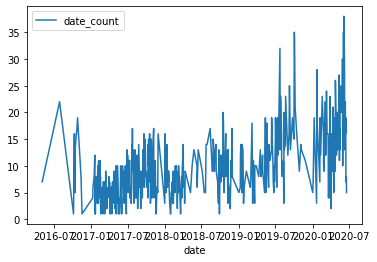

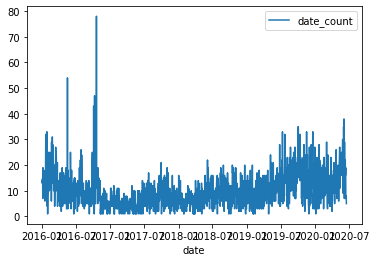

In [170]:
print(df1['cosine_similarity'].mean())
df1.plot(x ='date', y='date_count', kind = 'line')	
df2.plot(x ='date', y='date_count', kind = 'line')

<AxesSubplot:xlabel='date'>

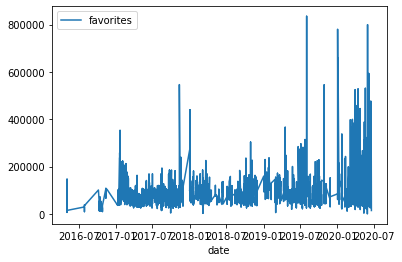

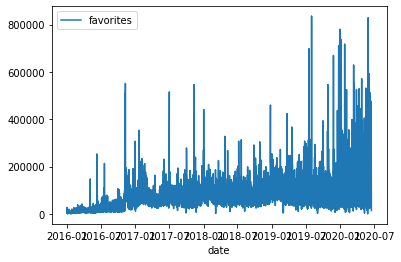

In [171]:
df1.plot(x ='date', y='favorites', kind = 'line')
df2.plot(x ='date', y='favorites', kind = 'line')

<AxesSubplot:xlabel='date'>

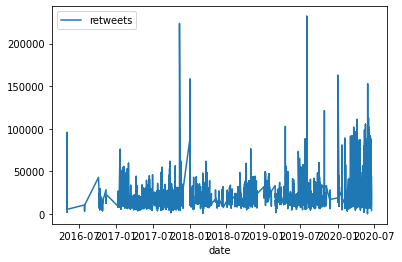

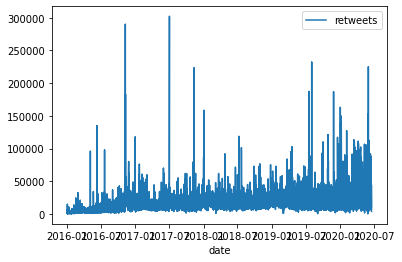

In [172]:
df1.plot(x ='date', y='retweets', kind = 'line')
df2.plot(x ='date', y='retweets', kind = 'line')